In [11]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score

warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set_style('darkgrid')
pd.set_option('display.max_columns', 100)

In [2]:
def my_train_test_split(model_data, train_columns, target = "upd23b_clinical_state_on_medication"):
    
    X = model_data[train_columns]
    y = model_data[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    
    return [X_train, X_test, y_train, y_test]

In [3]:
df = pd.read_csv("train_clinical_data.csv")
pro = pd.read_csv("train_proteins.csv")
pep = pd.read_csv("train_peptides.csv")

In [4]:
# We don't need it
df = df.drop(['patient_id', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4'], axis=1)
pro = pro.drop('patient_id', axis=1)
pep = pep.drop('patient_id', axis=1)

In [5]:
pep_pro = pd.merge(pro, pep, on=['visit_id', 'visit_month', 'UniProt'])
pep_pro['pep_per_pro'] = pep_pro['PeptideAbundance'] / pep_pro['NPX']

In [6]:
pep_pro = pep_pro.pivot(index=['visit_id', 'visit_month'], 
                        columns=['Peptide'], values=['pep_per_pro'])

pep_pro.columns = pep_pro.columns.droplevel()

In [7]:
pep_pro = pep_pro.reset_index()
pep_pro.head(2)

Peptide,visit_id,visit_month,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,AATGEC(UniMod_4)TATVGKR,AATVGSLAGQPLQER,AAVYHHFISDGVR,ADDKETC(UniMod_4)FAEEGK,ADDKETC(UniMod_4)FAEEGKK,ADDLGKGGNEESTKTGNAGSR,ADLSGITGAR,ADQVC(UniMod_4)INLR,ADRDQYELLC(UniMod_4)LDNTR,ADSGEGDFLAEGGGVR,AEAQEAEDQQAR,AEFAEVSK,AELQC(UniMod_4)PQPAA,AESPEVC(UniMod_4)FNEESPK,AFPALTSLDLSDNPGLGER,AGAAAGGPGVSGVC(UniMod_4)VC(UniMod_4)K,AGALNSNDAFVLK,AGC(UniMod_4)VAESTAVC(UniMod_4)R,AGDFLEANYMNLQR,AGKEPGLQIWR,AGLAASLAGPHSIVGR,AGLLRPDYALLGHR,AGLQVYNK,AIGAVPLIQGEYMIPC(UniMod_4)EK,AIGYLNTGYQR,AIPVTQYLK,AIQLTYNPDESSKPNMIDAATLK,AKAYLEEEC(UniMod_4)PATLRK,AKLEEQAQQIR,AKPALEDLR,AKWEMPFDPQDTHQSR,ALANSLAC(UniMod_4)QGK,ALDFAVGEYNK,ALEQDLPVNIK,ALEYIENLR,ALFLETEQLK,ALGISPFHEHAEVVFTANDSGPR,ALGISPFHEHAEVVFTANDSGPRR,ALMSPAGMLR,ALPGTPVASSQPR,ALQDQLVLVAAK,ALSIGFETC(UniMod_4)R,ALSSEWKPEIR,ALTDMPQMR,...,VTTVASHTSDSDVPSGVTEVVVK,VVEESELAR,VVEQMC(UniMod_4)ITQYER,VVVNFAPTIQEIK,VYAC(UniMod_4)EVTHQGLSSPVTK,VYC(UniMod_4)DMNTENGGWTVIQNR,VYTVDLGR,WC(UniMod_4)AVSEHEATK,WEAEPVYVQR,WELALGR,WGYC(UniMod_4)LEPK,WKNFPSPVDAAFR,WLPSSSPVTGYR,WQEEMELYR,WSGQTAIC(UniMod_4)DNGAGYC(UniMod_4)SNPGIPIGTR,WSRPQAPITGYR,WSSTSPHRPR,WYEIEKIPTTFENGR,WYFDVTEGK,YAMVYGYNAAYNR,YANC(UniMod_4)HLAR,YFIDFVAR,YGFIEGHVVIPR,YGLDSDLSC(UniMod_4)K,YGLVTYATYPK,YGQTIRPIC(UniMod_4)LPC(UniMod_4)TEGTTR,YHDRDVWKPEPC(UniMod_4)R,YIETDPANR,YIFHNFMER,YIVSGTPTFVPYLIK,YKAAFTEC(UniMod_4)C(UniMod_4)QAADK,YLFLNGNK,YLGEEYVK,YLQEIYNSNNQK,YLYEIAR,YNSQNQSNNQFVLYR,YPGPQAEGDSEGLSQGLVDREK,YPNC(UniMod_4)AYR,YPSLSIHGIEGAFDEPGTK,YQC(UniMod_4)YC(UniMod_4)YGR,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
0,10053_0,0,0.396378,0.208956,0.028741,NaN,NaN,NaN,0.017462,0.000877,NaN,NaN,0.363636,0.181739,0.018959,0.082915,NaN,NaN,0.018229,0.107385,0.35562,0.094122,0.102783,NaN,0.037975,0.177643,0.398248,0.424685,NaN,0.257545,0.150849,0.260018,0.264726,0.032744,0.010608,0.050815,NaN,NaN,0.174566,0.138540,1.0,NaN,0.043420,0.029329,0.521085,NaN,0.172091,0.478927,NaN,0.233814,...,0.332605,NaN,1.0,1.0,0.531244,0.181821,NaN,0.022425,0.027246,NaN,NaN,0.153953,0.138032,0.046412,0.041927,0.091973,NaN,0.176941,0.062475,NaN,NaN,NaN,0.521074,0.114415,0.323673,0.268332,NaN,NaN,NaN,0.087796,0.010523,0.100187,0.069823,0.184122,0.090821,0.053586,0.486134,NaN,0.189962,NaN,0.277204,NaN,0.908568,0.021554,0.162199,0.016149,0.466770,0.137420,NaN,0.021444
1,10053_12,12,0.411091,0.342469,0.019977,NaN,NaN,NaN,0.017125,0.000401,0.00017,NaN,0.331420,0.230214,0.012808,0.097100,NaN,NaN,0.017860,0.109764,0.35267,0.072347,0.093648,NaN,0.043707,0.157554,0.417811,0.470647,NaN,0.203406,0.183888,0.167259,0.325766,NaN,0.003631,0.055488,0.098978,NaN,0.195278,0.098181,1.0,NaN,0.096263,0.033384,0.594039,NaN,0.200722,0.418792,NaN,0.230033,...,0.382835,NaN,1.0,1.0,0.490661,0.158751,1.0,NaN,0.024554,NaN,NaN,0.183661,0.151922,0.046546,0.044899,0.099204,NaN,0.176960,0.077790,NaN,NaN,NaN,0.581209,0.182373,0.450395,0.276884,NaN,NaN,NaN,0.188269,0.009359,0.113386,0.073487,0.184562,0.086385,0.063543,0.503405,NaN,0.190099,NaN,0.209889,NaN,0.844482,0.018441,0.178483,0.021803,0.468994,0.122406,0.014664,0.072531


In [8]:
df = pd.merge(df, pep_pro, on=['visit_id', 'visit_month'], how='left')

In [9]:
# Prepare target
df.loc[df['upd23b_clinical_state_on_medication'] == 'On', 'upd23b_clinical_state_on_medication'] = 1
df.loc[df['upd23b_clinical_state_on_medication'] == 'Off', 'upd23b_clinical_state_on_medication'] = 0
df = df.dropna(subset=['upd23b_clinical_state_on_medication'])

In [10]:
# Reduce dataset, we don't need that much precision - make it faster!
df = df.round(4)

In [14]:
target = ["upd23b_clinical_state_on_medication"]

# Prepare data
model_data = df.set_index('visit_id')

train_columns = model_data.drop(target, axis=1).columns

recall = []
precision = []
accuracy = []
auc = []

for i in range(5):
    
    X_train, X_test, y_train, y_test = my_train_test_split(model_data, train_columns)

    X_train = X_train.fillna(-1)
    X_test = X_test.fillna(-1)

    # Model
    model = XGBClassifier(max_depth=5, n_estimators=50).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    recall.append(recall_score(np.array(y_test).tolist(), y_pred.tolist()))
    precision.append(precision_score(np.array(y_test).tolist(), y_pred.tolist()))
    accuracy.append(accuracy_score(np.array(y_test).tolist(), y_pred.tolist()))
    auc.append(roc_auc_score(np.array(y_test).tolist(), y_pred.tolist()))

In [15]:
print(np.mean(recall), np.mean(precision), np.mean(accuracy), np.mean(auc))

0.7635990026357728 0.7734957919775511 0.72018779342723 0.7106646907846437


In [16]:
cols = [str(c) for c in X_train.columns]

f_importance = pd.DataFrame({"col_name":cols, "importance":model.feature_importances_})

In [17]:
f_importance.sort_values(by="importance", ascending=False).head(20)

,col_name,importance
173,DVLLEAC(UniMod_4)C(UniMod_4)ADGHR,0.028753
949,YKAAFTEC(UniMod_4)C(UniMod_4)QAADK,0.022829
405,IYISGMAPR,0.022623
193,EIGELYLPK,0.022152
230,FEHC(UniMod_4)NFNDVTTR,0.021369
751,SPAINVAVHVFR,0.019648
592,NANTFISPQQR,0.019355
838,TSESGELHGLTTEEEFVEGIYK,0.019043
923,VYAC(UniMod_4)EVTHQGLSSPVTK,0.018300
802,THLAPYSDELR,0.016479


<BarContainer object of 20 artists>

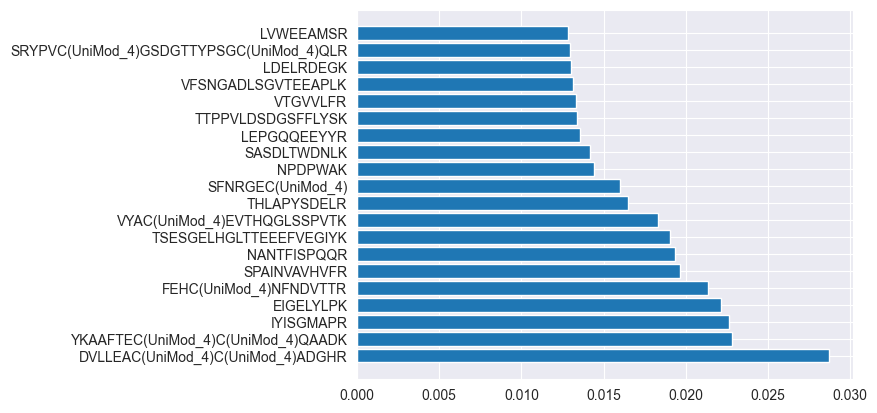

In [18]:
plt.barh(f_importance.sort_values(by="importance", ascending=False).head(20)['col_name'], 
         f_importance.sort_values(by="importance", ascending=False).head(20)['importance'])

In [19]:
f_importance.shape

(969, 2)

In [20]:
f_importance[f_importance['importance'] == 0]

,col_name,importance
2,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,0.0
4,AANEVSSADVK,0.0
7,AAVYHHFISDGVR,0.0
9,ADDKETC(UniMod_4)FAEEGKK,0.0
13,ADRDQYELLC(UniMod_4)LDNTR,0.0
...,...,...
963,YVMLPVADQDQC(UniMod_4)IR,0.0
964,YVNKEIQNAVNGVK,0.0
966,YYC(UniMod_4)FQGNQFLR,0.0
967,YYTYLIMNK,0.0


In [21]:
model_data

,visit_month,upd23b_clinical_state_on_medication,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,AATGEC(UniMod_4)TATVGKR,AATVGSLAGQPLQER,AAVYHHFISDGVR,ADDKETC(UniMod_4)FAEEGK,ADDKETC(UniMod_4)FAEEGKK,ADDLGKGGNEESTKTGNAGSR,ADLSGITGAR,ADQVC(UniMod_4)INLR,ADRDQYELLC(UniMod_4)LDNTR,ADSGEGDFLAEGGGVR,AEAQEAEDQQAR,AEFAEVSK,AELQC(UniMod_4)PQPAA,AESPEVC(UniMod_4)FNEESPK,AFPALTSLDLSDNPGLGER,AGAAAGGPGVSGVC(UniMod_4)VC(UniMod_4)K,AGALNSNDAFVLK,AGC(UniMod_4)VAESTAVC(UniMod_4)R,AGDFLEANYMNLQR,AGKEPGLQIWR,AGLAASLAGPHSIVGR,AGLLRPDYALLGHR,AGLQVYNK,AIGAVPLIQGEYMIPC(UniMod_4)EK,AIGYLNTGYQR,AIPVTQYLK,AIQLTYNPDESSKPNMIDAATLK,AKAYLEEEC(UniMod_4)PATLRK,AKLEEQAQQIR,AKPALEDLR,AKWEMPFDPQDTHQSR,ALANSLAC(UniMod_4)QGK,ALDFAVGEYNK,ALEQDLPVNIK,ALEYIENLR,ALFLETEQLK,ALGISPFHEHAEVVFTANDSGPR,ALGISPFHEHAEVVFTANDSGPRR,ALMSPAGMLR,ALPGTPVASSQPR,ALQDQLVLVAAK,ALSIGFETC(UniMod_4)R,ALSSEWKPEIR,ALTDMPQMR,...,VTTVASHTSDSDVPSGVTEVVVK,VVEESELAR,VVEQMC(UniMod_4)ITQYER,VVVNFAPTIQEIK,VYAC(UniMod_4)EVTHQGLSSPVTK,VYC(UniMod_4)DMNTENGGWTVIQNR,VYTVDLGR,WC(UniMod_4)AVSEHEATK,WEAEPVYVQR,WELALGR,WGYC(UniMod_4)LEPK,WKNFPSPVDAAFR,WLPSSSPVTGYR,WQEEMELYR,WSGQTAIC(UniMod_4)DNGAGYC(UniMod_4)SNPGIPIGTR,WSRPQAPITGYR,WSSTSPHRPR,WYEIEKIPTTFENGR,WYFDVTEGK,YAMVYGYNAAYNR,YANC(UniMod_4)HLAR,YFIDFVAR,YGFIEGHVVIPR,YGLDSDLSC(UniMod_4)K,YGLVTYATYPK,YGQTIRPIC(UniMod_4)LPC(UniMod_4)TEGTTR,YHDRDVWKPEPC(UniMod_4)R,YIETDPANR,YIFHNFMER,YIVSGTPTFVPYLIK,YKAAFTEC(UniMod_4)C(UniMod_4)QAADK,YLFLNGNK,YLGEEYVK,YLQEIYNSNNQK,YLYEIAR,YNSQNQSNNQFVLYR,YPGPQAEGDSEGLSQGLVDREK,YPNC(UniMod_4)AYR,YPSLSIHGIEGAFDEPGTK,YQC(UniMod_4)YC(UniMod_4)YGR,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
visit_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
55_9,9,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55_12,12,1,0.3619,0.1773,0.0235,1.0,0.0137,0.0088,0.0110,0.0002,0.0173,0.6161,0.2293,0.2055,0.0123,0.0635,0.0224,0.0632,0.0211,0.0667,0.1790,0.0833,0.0671,NaN,0.0379,0.1356,0.2068,0.4033,0.2167,0.1701,0.1234,0.1365,0.2488,0.0319,0.0502,0.0385,0.0701,0.4822,0.2481,0.1310,1.0,0.5920,0.0676,0.0423,0.5704,1.0,0.1662,0.4656,0.3319,0.1844,...,0.3028,0.4657,1.0,1.0,0.4386,0.0315,1.0,0.0369,0.0234,0.0282,NaN,0.1317,0.1317,0.0274,0.0251,0.0772,0.0247,0.1608,0.2418,0.0577,0.0024,0.1469,0.5344,0.1159,0.2987,0.2502,0.4071,0.0628,0.1103,0.0437,0.0086,0.1302,0.0612,0.2104,0.0822,0.0442,0.2842,0.172,0.1574,0.0037,0.2606,0.1583,0.7476,0.0283,0.1733,0.0127,0.3121,0.0760,0.0131,0.0377
55_18,18,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55_24,24,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55_30,30,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [22]:
target = "upd23b_clinical_state_on_medication"

In [28]:
df

,visit_id,visit_month,upd23b_clinical_state_on_medication,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,AATGEC(UniMod_4)TATVGKR,AATVGSLAGQPLQER,AAVYHHFISDGVR,ADDKETC(UniMod_4)FAEEGK,ADDKETC(UniMod_4)FAEEGKK,ADDLGKGGNEESTKTGNAGSR,ADLSGITGAR,ADQVC(UniMod_4)INLR,ADRDQYELLC(UniMod_4)LDNTR,ADSGEGDFLAEGGGVR,AEAQEAEDQQAR,AEFAEVSK,AELQC(UniMod_4)PQPAA,AESPEVC(UniMod_4)FNEESPK,AFPALTSLDLSDNPGLGER,AGAAAGGPGVSGVC(UniMod_4)VC(UniMod_4)K,AGALNSNDAFVLK,AGC(UniMod_4)VAESTAVC(UniMod_4)R,AGDFLEANYMNLQR,AGKEPGLQIWR,AGLAASLAGPHSIVGR,AGLLRPDYALLGHR,AGLQVYNK,AIGAVPLIQGEYMIPC(UniMod_4)EK,AIGYLNTGYQR,AIPVTQYLK,AIQLTYNPDESSKPNMIDAATLK,AKAYLEEEC(UniMod_4)PATLRK,AKLEEQAQQIR,AKPALEDLR,AKWEMPFDPQDTHQSR,ALANSLAC(UniMod_4)QGK,ALDFAVGEYNK,ALEQDLPVNIK,ALEYIENLR,ALFLETEQLK,ALGISPFHEHAEVVFTANDSGPR,ALGISPFHEHAEVVFTANDSGPRR,ALMSPAGMLR,ALPGTPVASSQPR,ALQDQLVLVAAK,ALSIGFETC(UniMod_4)R,ALSSEWKPEIR,...,VTTVASHTSDSDVPSGVTEVVVK,VVEESELAR,VVEQMC(UniMod_4)ITQYER,VVVNFAPTIQEIK,VYAC(UniMod_4)EVTHQGLSSPVTK,VYC(UniMod_4)DMNTENGGWTVIQNR,VYTVDLGR,WC(UniMod_4)AVSEHEATK,WEAEPVYVQR,WELALGR,WGYC(UniMod_4)LEPK,WKNFPSPVDAAFR,WLPSSSPVTGYR,WQEEMELYR,WSGQTAIC(UniMod_4)DNGAGYC(UniMod_4)SNPGIPIGTR,WSRPQAPITGYR,WSSTSPHRPR,WYEIEKIPTTFENGR,WYFDVTEGK,YAMVYGYNAAYNR,YANC(UniMod_4)HLAR,YFIDFVAR,YGFIEGHVVIPR,YGLDSDLSC(UniMod_4)K,YGLVTYATYPK,YGQTIRPIC(UniMod_4)LPC(UniMod_4)TEGTTR,YHDRDVWKPEPC(UniMod_4)R,YIETDPANR,YIFHNFMER,YIVSGTPTFVPYLIK,YKAAFTEC(UniMod_4)C(UniMod_4)QAADK,YLFLNGNK,YLGEEYVK,YLQEIYNSNNQK,YLYEIAR,YNSQNQSNNQFVLYR,YPGPQAEGDSEGLSQGLVDREK,YPNC(UniMod_4)AYR,YPSLSIHGIEGAFDEPGTK,YQC(UniMod_4)YC(UniMod_4)YGR,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
3,55_9,9,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,55_12,12,1,0.3619,0.1773,0.0235,1.0,0.0137,0.0088,0.0110,0.0002,0.0173,0.6161,0.2293,0.2055,0.0123,0.0635,0.0224,0.0632,0.0211,0.0667,0.1790,0.0833,0.0671,NaN,0.0379,0.1356,0.2068,0.4033,0.2167,0.1701,0.1234,0.1365,0.2488,0.0319,0.0502,0.0385,0.0701,0.4822,0.2481,0.1310,1.0,0.5920,0.0676,0.0423,0.5704,1.0,0.1662,0.4656,0.3319,...,0.3028,0.4657,1.0,1.0,0.4386,0.0315,1.0,0.0369,0.0234,0.0282,NaN,0.1317,0.1317,0.0274,0.0251,0.0772,0.0247,0.1608,0.2418,0.0577,0.0024,0.1469,0.5344,0.1159,0.2987,0.2502,0.4071,0.0628,0.1103,0.0437,0.0086,0.1302,0.0612,0.2104,0.0822,0.0442,0.2842,0.172,0.1574,0.0037,0.2606,0.1583,0.7476,0.0283,0.1733,0.0127,0.3121,0.0760,0.0131,0.0377
5,55_18,18,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,55_24,24,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,55_30,30,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [30]:
df[target] = df[target].astype(float)

-------> Fold 1 <--------
: AUC ROC = 0.7915497448979592
-------> Fold 2 <--------
: AUC ROC = 0.808494373776908
-------> Fold 3 <--------
: AUC ROC = 0.7424365800187911
-------> Fold 4 <--------
: AUC ROC = 0.7463057324840764
-------> Fold 5 <--------
: AUC ROC = 0.7910191082802547
--> Overall results for out of fold predictions
: AUC ROC = 0.7711601584606679


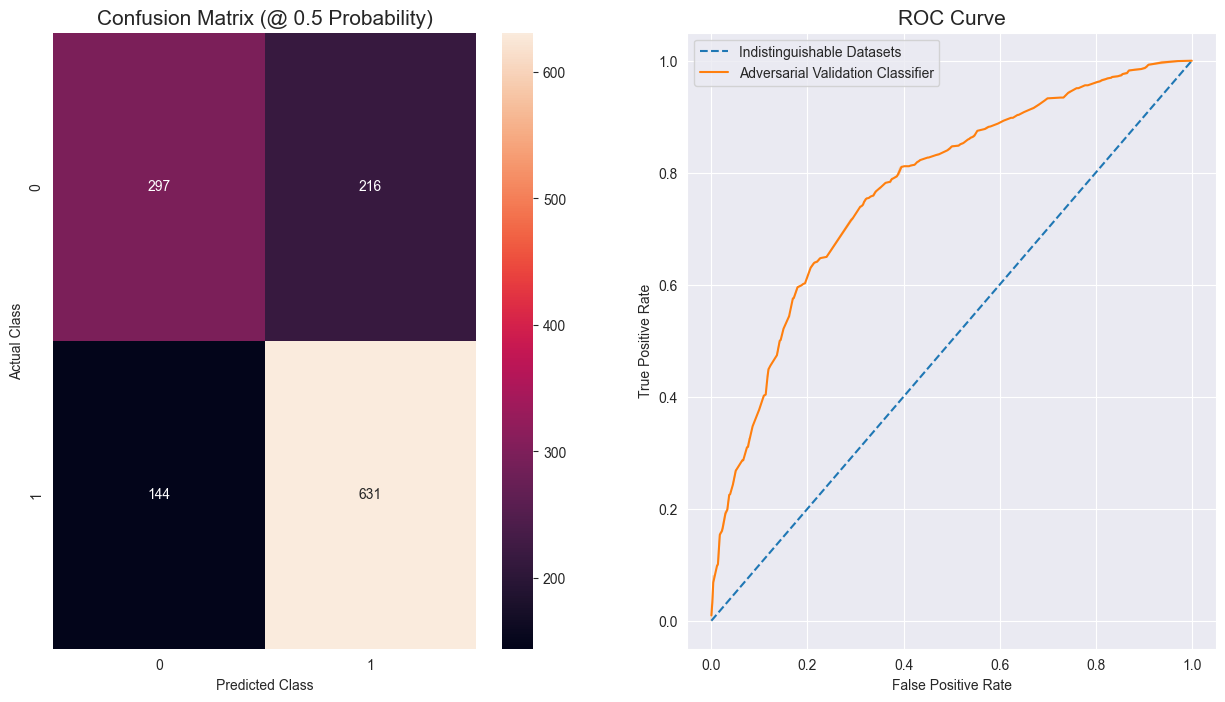

In [32]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier
from lightgbm import early_stopping, log_evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder

# train_clinical_data["origin"] = 0
# supplemental_clinical_data["origin"] = 1

combined = df

features = train_columns
# le = LabelEncoder()
# combined['upd23b_clinical_state_on_medication'] = le.fit_transform(combined['upd23b_clinical_state_on_medication'])
    
n_folds = 5
skf = KFold(n_splits=n_folds, random_state=2023, shuffle=True)
train_oof_preds = np.zeros((combined.shape[0],))
train_oof_probas = np.zeros((combined.shape[0],))

for fold, (train_index, test_index) in enumerate(skf.split(combined, combined[target])):
    print("-------> Fold {} <--------".format(fold + 1))
    x_train, x_valid = pd.DataFrame(combined.iloc[train_index]), pd.DataFrame(combined.iloc[test_index])
    y_train, y_valid = combined[target].iloc[train_index], combined[target].iloc[test_index]
    
    x_train_features = pd.DataFrame(x_train[features])
    x_valid_features = pd.DataFrame(x_valid[features])

    model = LGBMClassifier(
        random_state=2023,
        objective="binary",
        metric="auc",
        n_jobs=-1,
        n_estimators=2000,
        verbose=-1,  
        max_depth=3,
    )
    model.fit(
        x_train_features[features], 
        y_train,
        eval_set=[(x_valid_features[features], y_valid)],
        callbacks=[
            early_stopping(50, verbose=False),
            log_evaluation(2000),
        ]
    )
    oof_preds = model.predict(x_valid_features[features])
    oof_probas = model.predict_proba(x_valid_features[features])[:,1]
    train_oof_preds[test_index] = oof_preds
    train_oof_probas[test_index] = oof_probas
    print(": AUC ROC = {}".format(roc_auc_score(y_valid, oof_probas)))
    
auc_vanilla = roc_auc_score(combined[target], train_oof_probas)
fpr, tpr, _ = roc_curve(combined[target], train_oof_probas)
print("--> Overall results for out of fold predictions")
print(": AUC ROC = {}".format(auc_vanilla))

confusion = confusion_matrix(combined[target], train_oof_preds)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

labels = ["0", "1"]

_ = sns.heatmap(confusion, annot=True, fmt=",d", ax=axs[0], xticklabels=labels, yticklabels=labels)
_ = axs[0].set_title("Confusion Matrix (@ 0.5 Probability)", fontsize=15)
_ = axs[0].set_ylabel("Actual Class")
_ = axs[0].set_xlabel("Predicted Class")

_ = sns.lineplot(x=[0, 1], y=[0, 1], linestyle="--", label="Indistinguishable Datasets", ax=axs[1])
_ = sns.lineplot(x=fpr, y=tpr, ax=axs[1], label="Adversarial Validation Classifier")
_ = axs[1].set_title("ROC Curve", fontsize=15)
_ = axs[1].set_xlabel("False Positive Rate")
_ = axs[1].set_ylabel("True Positive Rate")